# Position and Velocity

This is a presentation for Computer Science Club having to do with Kalman filters.  The idea of this notebook is a graphical display of how the process covariance and measurement covariance for a simple Kalman state space (position and velocity) can give a better estimate.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


class Plot:
    def __init__(self, limits=((-10,10),(-10,10))):
        x, y = limits
        x_min, x_max = x
        y_min, y_max = y
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        
    def scatter(self, data, color='g', alpha=0.5, area=20):
        x = [d[0] for d in data]
        y = [d[1] for d in data]
        areas = [area for d in data]
        colors = [color for d in data]
        plt.scatter(x, y, s=areas, c=colors, alpha=alpha, edgecolor=None)
        
    def show(self):
        plt.show() 
        

class Gaussian:
    def generate(self, params, samples=300):
        self.data = []
        for i in range(samples):
            self.data.append(np.random.multivariate_normal(params[0], params[1]))
    
    def points(self):
        return self.data

At first we have a reasonable estimate (measurement error) of the position, but no idea what the velocity is.  We can initialize the state covariance to the measurement with the measurement error and a high variance for the velocity.  Note that covariances are different than the standard deviation that was used in the `Gaussian` notebook for the univariate distributions.  Here we keep the standard deviation and just square it explicitly so it is more apparent to look at.

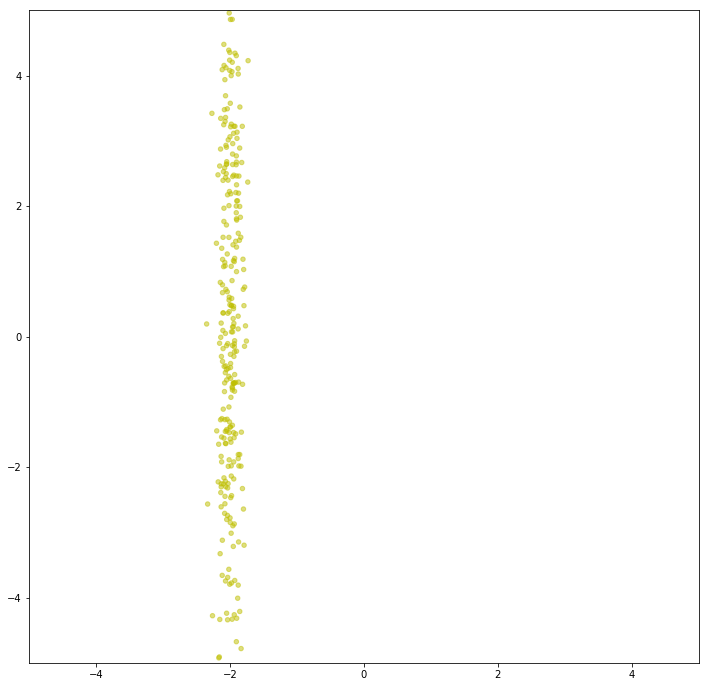

In [7]:
plt.figure(figsize=(12,12))

p = Plot(((-5,5),(-5,5)))            
            
# Position estimate 
g = Gaussian()
mean = [-2, 0]
cov = [[0.1**2, 0], [0, 3**2]]
g.generate((mean, cov))
p.scatter(g.points(), 'y')      

p.show()    
    

Next we will project a distribution with non-zero covariance that is the posterior estimate (prediction).  This is a distribution representing a wide range of possible velocities.  At this point we don't know what the next position or velocity would be, but we have a sense of the relationship between potential velocities and potential positions.

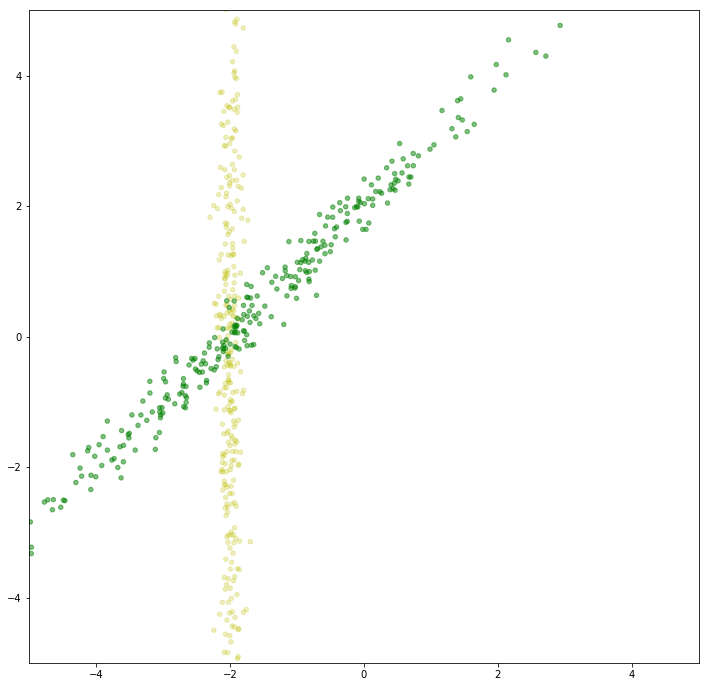

In [8]:
plt.figure(figsize=(12,12))

p = Plot(((-5,5),(-5,5)))            
            
# Position estimate 
g = Gaussian()
mean = [-2, 0]
cov = [[0.1**2, 0], [0.0, 3**2]]
g.generate((mean, cov))
p.scatter(g.points(), 'y', 0.25)     

# Projection of all possible positions and velicities given assumptions
g = Gaussian()
mean = [-2, 0]
cov = [[4.02, 4], [4, 4.04]]
g.generate((mean, cov))
p.scatter(g.points(), 'g')    

p.show()    
    

Next we will add the next measurement, with high variance in velocity and low variance in position, just like the first one.

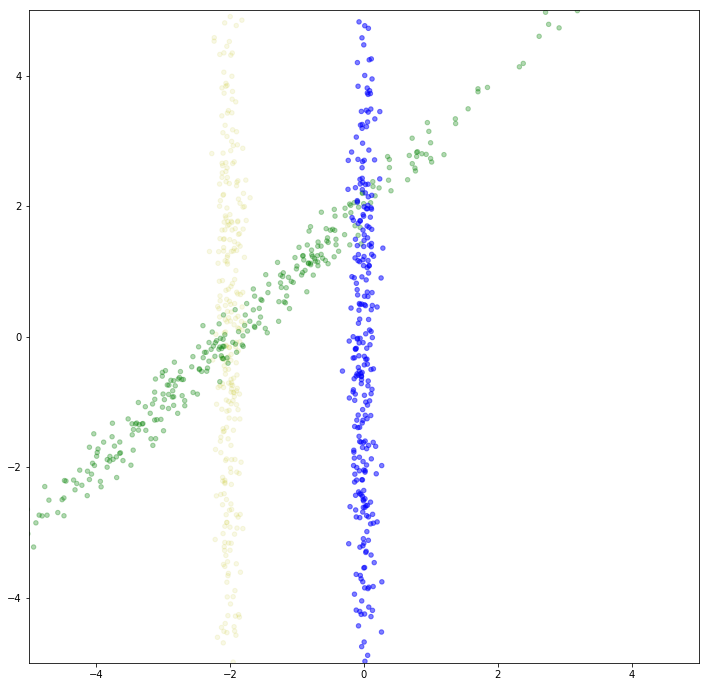

In [9]:
plt.figure(figsize=(12,12))

p = Plot(((-5,5),(-5,5)))            
            
# Position estimate 
g = Gaussian()
mean = [-2, 0]
cov = [[0.1**2, 0], [0.0, 3**2]]
g.generate((mean, cov))
p.scatter(g.points(), 'y', 0.1)     

# Projection of all possible positions and velicities given assumptions
g = Gaussian()
mean = [-2, 0]
cov = [[4.02, 4], [4, 4.04]]
g.generate((mean, cov))
p.scatter(g.points(), 'g', 0.3)   

# New position estimate
g = Gaussian()
mean = [0, 0]
cov = [[0.1**2, 0], [0.0, 3**2]]
g.generate((mean, cov))
p.scatter(g.points(), 'b')    

p.show()    
    

Now the posterior prediction (the green samples) and the current measurement (the blue samples) are used in the Bayesian sense to estimate the new state.  As can be readily appreciated from the graph and our previous investigation of Gaussian multiplication, the intersection is where the bulk of the distribution will be located.  If we perform this operation, we would end up with something like this:

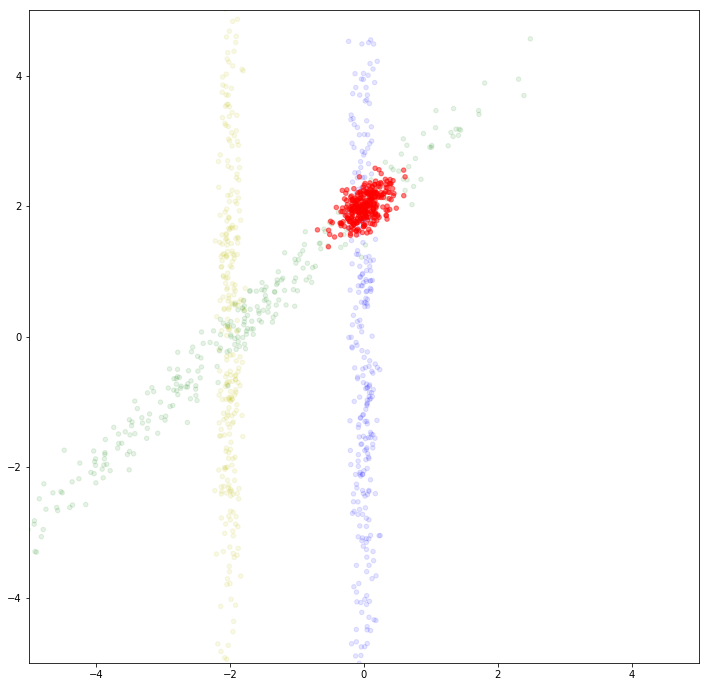

In [10]:
plt.figure(figsize=(12,12))

p = Plot(((-5,5),(-5,5)))            

# Position estimate 
g = Gaussian()
mean = [-2, 0]
cov = [[0.1**2, 0], [0.0, 3**2]]
g.generate((mean, cov))
p.scatter(g.points(), 'y', 0.1)     

# Projection of all possible positions and velicities given assumptions
g = Gaussian()
mean = [-2, 0]
cov = [[4.02, 4], [4, 4.04]]
g.generate((mean, cov))
p.scatter(g.points(), 'g', 0.1)   

# New position estimate
g = Gaussian()
mean = [0, 0]
cov = [[0.1**2, 0], [0.0, 3**2]]
g.generate((mean, cov))
p.scatter(g.points(), 'b', 0.1)  

# Composite estimate
g = Gaussian()
mean = [0, 2]
cov = [[0.2**2, 0.02], [0.02, 0.2**2]]
g.generate((mean, cov))
p.scatter(g.points(), 'r') 

p.show()    

As can be seen, the resulting state estimate is significantly better than the first!  Each iteration of the Kalman filter then adds process noise and refines the estimated state based on the next measurement.  The first part is adding noise, so the variance of the ditribution increases.  The last part is multiplication that decreases the variance of the distribution.  It is this give and take that allows you to estimate where the predicted new points should be (with associated error cumulative error) and then refine the estimate of state based on the actual measured values (with reduction in error based on the multiplicative action of the posterior).